**1.**

**Preprocessing**: If we have missing values or outlier or irrelevent columns --> Remove

**Exploratory Data Analysis (EDA)**: Plot graphs to identifying characteristics, patterns, and relationships in the data.

**Feature slection**: Generally not use all columns.

*Once you are sure, These column and data you will give to model.*

**2.** **Seperate input and output column**

**3.** **Scale the Values**

**4.** **Train test split**

**5. Train the model**

**6**. **Evaluate the model**

**7.** **Deploy the model**

# **Preprocessing**

In [10]:
import numpy as np
import pandas as pd

df= pd.read_csv('/content/placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [11]:
df.info() # To check null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [12]:
df.shape

(100, 4)

In [13]:
# Remove irrelevent Column
df = df.iloc[:,1:] # All Rows: 1 onward columns
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


# **Exploratory Data Analysis (EDA)**

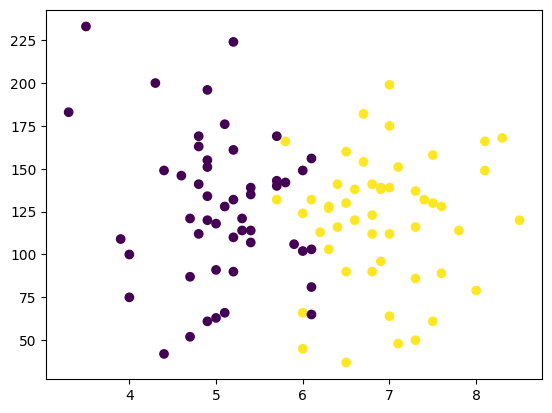

In [15]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'], c=df['placement'])

**After EDA, we understand Data is linear and we can use logistic regression**

# **Seperate input and output column**

In [19]:
X=df.iloc[:,0:2] # All rows and 0,1 Columns
y=df.iloc[:,-1] # Last column

In [25]:
X # Matrics / 2D tensor

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [24]:
y # Vector / 1D Tensor

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

# **Train Test Split**

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)
X_train

,cgpa,iq
93,6.8,112.0
32,7.0,139.0
61,7.3,137.0
3,7.4,132.0
79,6.5,90.0
...,...,...
59,4.8,112.0
57,6.5,130.0
78,6.1,81.0
96,4.4,42.0


In [28]:
y_train

93    1
32    1
61    1
3     1
79    1
     ..
59    0
57    1
78    0
96    0
38    1
Name: placement, Length: 90, dtype: int64

# **Scale the Values**

In [32]:
# Go to sklearn library and specifically preprocessing module and import StandardScaler Class
from sklearn.preprocessing import StandardScaler

# Make object of class
scaler = StandardScaler()

In [35]:
# Fit --> First it will analyze the data and then transform
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.67571915, -0.28910672],
       [ 0.85862058,  0.43814932],
       [ 1.13297271,  0.3842785 ],
       [ 1.22442342,  0.24960145],
       [ 0.40136701, -0.88168571],
       [-0.87894296,  0.14185982],
       [ 2.04747983,  1.21927617],
       [-1.15329509,  1.08459913],
       [-0.60459082, -0.2352359 ],
       [-1.06184438, -0.07362345],
       [-0.33023868,  0.54589095],
       [-1.2447458 , -0.96249194],
       [-0.97039367, -0.8547503 ],
       [ 0.76716986,  0.43814932],
       [-0.05588655, -0.55846081],
       [ 0.3099163 ,  0.49202013],
       [ 1.7731277 , -1.17797521],
       [-1.06184438,  1.97346762],
       [-0.23878797,  1.16540535],
       [ 0.85862058, -0.28910672],
       [-0.05588655,  0.7075034 ],
       [ 0.21846559,  0.11492441],
       [ 0.67571915,  0.00718278],
       [-0.78749224,  2.72765906],
       [ 0.58426844,  0.84218045],
       [ 0.67571915,  0.49202013],
       [ 1.86457841,  0.7075034 ],
       [-1.88490079, -0.61233163],
       [-0.33023868,

In [37]:
# It understand the data during X_train So direct apply transform
X_test=scaler.transform(X_test)
X_test

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([[  7.1, 151. ],
       [  5.2, 110. ],
       [  7.5,  61. ],
       [  6. ,  45. ],
       [  5.4, 107. ],
       [  5.2,  90. ],
       [  3.5, 233. ],
       [  3.3, 183. ],
       [  4.3, 200. ],
       [  6.1, 132. ]])

# **Train the model**

In [38]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression() # clf have power of all functions present in LogisticRegression

# Train the Model
clf.fit(X_train,y_train)

LogisticRegression()

# **Evaluate the model**

In [39]:
clf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [40]:
y_test

21    1
92    0
44    1
10    1
81    0
28    0
50    0
17    0
95    0
71    1
Name: placement, dtype: int64

In [41]:
# Store in variable
y_predict = clf.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.4

# **Draw a Boundary Line**

<Axes: >

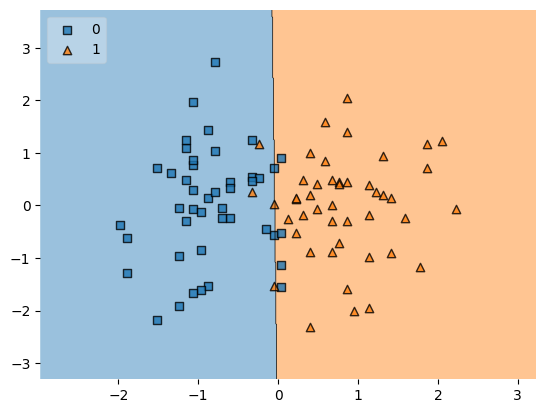

In [45]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)
